# Using the OpenAI API (GPT-4o Multimodal)

## Overview

這則教學說明如何有效地使用 OpenAI 的 ```GPT-4o``` 多模態模型，並使用 ```LangChain```, 一個建構語言模型應用程序的靈活框架。您將學習如何設定和使用 ```ChatOpenAI``` 物件來完成任務，例如生成回應、分析模型輸出，以及利用進階功能如實時回應流式傳輸和詞元概率分析。在本指南結束時，您將獲得工具來輕鬆有效地實驗和部署複雜的 AI 解決方案。


### Table of Contents

- [Overview](#overview)
- [Environment Setup](#environment-setup)
- [ChatOpenAI GPT-4o Multimodal](#chatopenai-gpt-4o-multimodal)
- [Multimodal AI: Text and Image Processing with GPT-4o](#multimodal-ai-text-and-image-processing-with-gpt-4o)
- [Configuring Multimodal AI with System and User Prompts](#configuring-multimodal-ai-with-system-and-user-prompts)


### References

- [OpenAI Model Overview](https://platform.openai.com/docs/models)

----

# Using the OpenAI API (GPT-4o Multimodal)

## 環境設定

設定環境. 您可以查看 [環境設定](https://wikidocs.net/257836) 以獲取更多詳細信息。

**[注意事項]**
- ```langchain-opentutorial``` 是一個提供一套容易使用的環境設定、有用的功能和工具的套件，用於教程。 
- 您可以查看 [```langchain-opentutorial```](https://github.com/LangChain-OpenTutorial/langchain-opentutorial-pypi) 以獲取更多詳細信息。

In [1]:
%%capture --no-stderr
%pip install langchain-opentutorial

In [ ]:
# Install required packages
# !pip install "langchain>=0.3.16,<0.4.0" --upgrade

In [1]:
# Install required packages
from langchain_opentutorial import package

package.install(
    ["langchain", "langchain_openai"],
    verbose=False,
    upgrade=False,
)

In [ ]:
# Set environment variables
from langchain_opentutorial import set_env

set_env(
    {
        "OPENAI_API_KEY": "<Your OpenAI API KEY>",
        "LANGCHAIN_API_KEY": "<Your LangChain API KEY>",
        "LANGCHAIN_TRACING_V2": "true",
        "LANGCHAIN_ENDPOINT": "https://api.smith.langchain.com",
        "LANGCHAIN_PROJECT": "Using-OpenAI-API",
    }
)

Environment variables have been set successfully.


You can alternatively set API keys such as ```OPENAI_API_KEY``` in a ```.env``` file and load them.

[Note] This is not necessary if you've already set the required API keys in previous steps.

In [2]:
# Configuration file to manage the API KEY as an environment variable
from dotenv import load_dotenv

# Load API KEY information
load_dotenv(override=True)

True

## ChatOpenAI GPT-4o Multimodal

這是 OpenAI 提供的專門用於聊天的大型語言模型 (LLM)。

在建立物件時，可以指定以下選項。選項的詳細信息如下:

```temperature```

- 指定采樣溫度，可以在 0 和 2 之間選擇。較高的值，例如 0.8，會產生更多的隨機輸出，而較低的值，例如 0.2，會使輸出更集中和確定性。

```max_tokens```

- 指定生成的聊天完成的最大詞元數。

```model_name``` : 可用的模型列表
- ```gpt-4o```
- ```gpt-4o-mini```
- ```o1-preview```, ```o1-preview-mini``` : 只有在五級帳戶中可用，需要最低充值 $1,000 才能使用。

![gpt-models.png](./assets/04-using-openai-api-gpt4o-get-models.png)

- Link: https://platform.openai.com/docs/models



In [3]:
from langchain_openai.chat_models import ChatOpenAI

# Create the ChatOpenAI object
llm = ChatOpenAI(
    temperature=0.1,  # Creativity (range: 0.0 ~ 2.0)
    model_name="gpt-4o-mini",  # Model name
)

question = "What is the capital of USA?"

print(f"[Answer]: {llm.invoke(question)}")

[Answer]: content='The capital of the United States is Washington, D.C.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 14, 'total_tokens': 26, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'finish_reason': 'stop', 'logprobs': None} id='run--9d00a8ff-0950-4e94-b341-c5162096d4fb-0' usage_metadata={'input_tokens': 14, 'output_tokens': 12, 'total_tokens': 26, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


### Response Format (AI Message)
使用 ```ChatOpenAI``` 物件時，回應以 AI Message 格式返回。此格式包括由模型生成的文本內容，以及任何與回應相關的元數據或附加屬性。這些提供結構化的信息，關於 AI 的回應和生成方式。

**Key Components of AI Message**
1. **```content```**  
   - **定義:** AI 生成的主要回應文本。  
   - **範例:** **"The capital of South Korea is Seoul."**
   - **用途:** 這是使用者互動的主要部分。

2. **```response_metadata```**  
   - **定義:** 回應生成過程的元數據。  
   - **Key Fields:**
     - **```model_name``` :** 使用的模型名稱 (例如，```"gpt-4o-mini"``` )。
     - **```finish_reason``` :** 生成停止的原因 (**stop** 代表正常完成)。
     - **```token_usage``` :** Token 使用細節:
       - **```prompt_tokens``` :** 用於輸入查詢的 Token 數。
       - **```completion_tokens``` :** 用於回應的 Token 數。
       - **```total_tokens``` :** 總 Token 數。

3. **```id```**  
   - **Definition:** 一個唯一的 API 調用識別碼。  
   - **Purpose:** 有用於追蹤或除錯特定互動。

In [4]:
# Query content
question = "中華民國台灣的首都是台北嗎？"

# Query
response = llm.invoke(question)
response

AIMessage(content='是的，中華民國（台灣）的首都是台北。台北是台灣的政治、經濟和文化中心，擁有許多重要的政府機構和文化設施。', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 45, 'prompt_tokens': 20, 'total_tokens': 65, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'finish_reason': 'stop', 'logprobs': None}, id='run--24aa5bfd-35a4-41ba-bfb0-e7eddb13ae9a-0', usage_metadata={'input_tokens': 20, 'output_tokens': 45, 'total_tokens': 65, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [5]:
# Extract key components
content = response.content  # AI's response text
model_name = response.response_metadata["model_name"]
total_tokens = response.response_metadata["token_usage"]["total_tokens"]

# Print results
print(f"Response: {content}")
print(f"Model: {model_name}")
print(f"Total Tokens Used: {total_tokens}")

Response: 是的，中華民國（台灣）的首都是台北。台北是台灣的政治、經濟和文化中心，擁有許多重要的政府機構和文化設施。
Model: gpt-4o-mini-2024-07-18
Total Tokens Used: 65


### Activating ```LogProb```

```LogProb``` 表示模型分配給預測詞元的 **對數概率**。詞元是文本的個別單元，例如單詞、字符或單詞的一部分。概率表示模型預測每個詞元的信心。

**Use Cases**:
```LogProb``` 可以用於評估模型的預測信心、調試問題和優化提示。通過分析 ```LogProb``` 資料，您可以了解模型為何選擇特定詞元。

**Caution**:
啟用 ```LogProb``` 會增加回應資料的大小，可能影響 API 的速度和成本。建議在必要時才啟用它。

In [6]:
# Object creation with LogProb enabled
llm_with_logprob = ChatOpenAI(
    temperature=0.1, max_tokens=2048, model_name="gpt-4o-mini"
).bind(
    logprobs=True
)  # Activating LogProb to retrieve token-level probabilities

In [7]:
# Query content
question = "中華民國的首都是台北嗎？"

# Query
response = llm_with_logprob.invoke(question)

# 展示 反應 metadata
print(response.response_metadata)

{'token_usage': {'completion_tokens': 32, 'prompt_tokens': 18, 'total_tokens': 50, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'finish_reason': 'stop', 'logprobs': {'content': [{'token': '是', 'bytes': [230, 152, 175], 'logprob': -1.4378848391061183e-05, 'top_logprobs': []}, {'token': '的', 'bytes': [231, 154, 132], 'logprob': 0.0, 'top_logprobs': []}, {'token': '，中', 'bytes': [239, 188, 140, 228, 184, 173], 'logprob': -0.023312797769904137, 'top_logprobs': []}, {'token': '華', 'bytes': [232, 143, 175], 'logprob': -1.0280383548888494e-06, 'top_logprobs': []}, {'token': '民', 'bytes': [230, 176, 145], 'logprob': 0.0, 'top_logprobs': []}, {'token': '國', 'bytes': [229, 156, 139], 'logprob': -1.4498052223643754e-05, 'top_logprobs': []}, {'token': '的', 'byte

### Streaming Output

串流 選項特別適合接收即時的回應。

不像等待整個回應生成，模型會流式輸出 token by token or in 切割塊, 使互動更快，並立即提供反饋。

In [11]:
answer = llm.stream(
    "請提供 10 台灣最美的旅遊景點，並附上地址！用繁體中文回答"
)

# Streaming real-time output
for token in answer:
    print(token.content, end="", flush=True)

當然可以！以下是台灣十個最美的旅遊景點及其地址：

1. **日月潭**
   - 地址：南投縣魚池鄉日月潭

2. **阿里山**
   - 地址：嘉義縣阿里山鄉

3. **九份**
   - 地址：新北市瑞芳區九份

4. **太魯閣國家公園**
   - 地址：花蓮縣秀林鄉

5. **墾丁國家公園**
   - 地址：屏東縣墾丁

6. **台北101**
   - 地址：台北市信義區信義路五段7號

7. **士林官邸**
   - 地址：台北市士林區中正路60號

8. **花蓮海洋公園**
   - 地址：花蓮縣花蓮市海洋公園路

9. **綠島**
   - 地址：台東縣綠島鄉

10. **南投溪頭森林遊樂區**
    - 地址：南投縣鹿谷鄉溪頭村

這些景點各具特色，無論是自然風光還是文化歷史，都非常值得一遊！希望你能享受台灣的美麗！

## Multimodal AI: Text and Image Processing with GPT-4o

多模態指的是整合和處理多種訊息（模態）的技術或方法。這包括各種數據類型，如：

- 文本：以書面形式的訊息，如文件、書籍或網頁。
- 圖像：視覺訊息，包括照片、圖表或插圖。
- 音頻：聽覺訊息，如語音、音樂或音效。
- 影音：視覺和聽覺訊息的組合，包括視頻片段或實時流。

```gpt-4o``` 和 ```gpt-4-turbo``` 都配備了視覺能力，使它們能夠處理和識別圖像，同時處理文本輸入。 

### Step 1. Setting up ChatOpenAI

首先, 建立一個 ```ChatOpenAI``` object 和 ```gpt-4o``` model, 並啟用串流功能.

In [12]:
# Create the ChatOpenAI object
llm = ChatOpenAI(
    temperature=0.1,
    model_name="gpt-4o",
    streaming=True,  # Enable streaming for real-time output
)

### Step 2. Encoding Images
影像需要被編碼成 **Base64** 格式，以便模型處理。以下函數可以處理 URL 和本地影像文件：

In [13]:
# 匯入處理 HTTP 請求的 requests 套件
import requests
# 匯入 base64 模組，用於將圖片內容進行 base64 編碼
import base64
# 匯入 mimetypes 模組，用來根據檔案副檔名推測 MIME 類型
import mimetypes
# 從 IPython.display 匯入 display、HTML、Image，用於在 Jupyter Notebook 顯示圖片或 HTML
from IPython.display import display, HTML, Image

# 定義一個函式 encode_image，用來將本地或網路圖片轉為 base64 格式的 data URL
def encode_image(image_path_or_url):
    # 檢查輸入的路徑是否是以 http:// 或 https:// 開頭（代表為網路圖片 URL）
    if image_path_or_url.startswith("http://") or image_path_or_url.startswith(
        "https://"
    ):
        # 從指定的 URL 下載圖片內容
        response = requests.get(image_path_or_url)
        if response.status_code == 200:
            # 如果回應成功（狀態碼為 200），將圖片的二進位內容存入 image_content
            image_content = response.content
        else:
            # 若無法成功下載，則拋出例外錯誤
            raise Exception(f"Failed to download image: {response.status_code}")
        
        # 根據圖片 URL 推測其 MIME 類型（例如 image/png、image/jpeg）
        mime_type, _ = mimetypes.guess_type(image_path_or_url)
        if mime_type is None:
            # 若無法推測出類型，則預設為 application/octet-stream（一般二進位資料格式）
            mime_type = "application/octet-stream"
    else:
        # 如果不是 URL，則視為本機檔案路徑
        try:
            # 以二進位模式打開圖片檔案並讀取內容
            with open(image_path_or_url, "rb") as image_file:
                image_content = image_file.read()
            # 根據本地檔案的副檔名推測 MIME 類型
            mime_type, _ = mimetypes.guess_type(image_path_or_url)
            if mime_type is None:
                # 若無法推測出類型，則預設為 application/octet-stream
                mime_type = "application/octet-stream"
        except FileNotFoundError:
            # 若檔案不存在則拋出錯誤
            raise Exception(f"File not found: {image_path_or_url}")

    # 將圖片的二進位資料進行 base64 編碼，並組合成 data URL 格式（data:<MIME類型>;base64,...）
    return f"data:{mime_type};base64,{base64.b64encode(image_content).decode()}"

**Example: Encode and Display an Image** 

* URL-based Image:


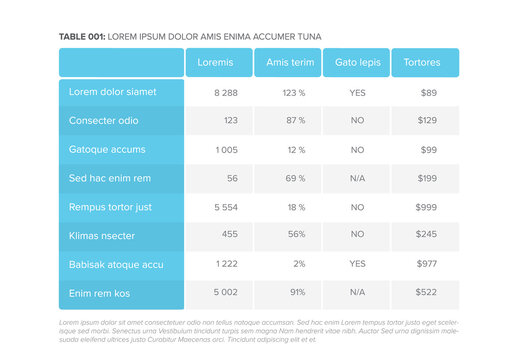

In [14]:
IMAGE_URL = "https://t3.ftcdn.net/jpg/03/77/33/96/360_F_377339633_Rtv9I77sSmSNcev8bEcnVxTHrXB4nRJ5.jpg"
encoded_image_url = encode_image(IMAGE_URL)
display(Image(url=encoded_image_url))  # Display the image

* Local Image:


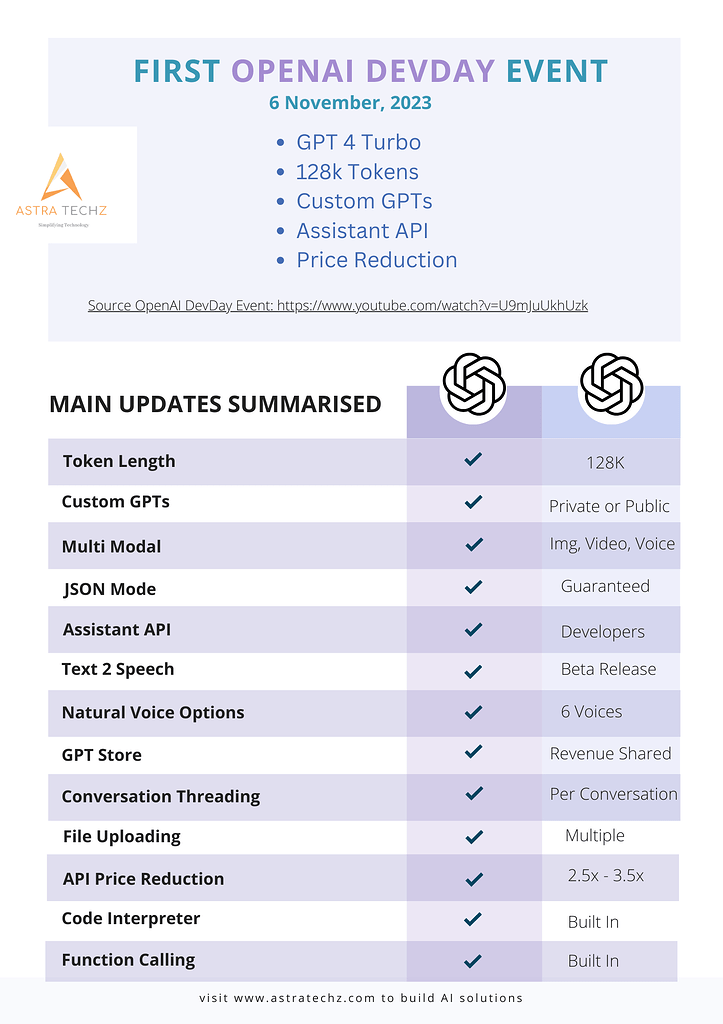

In [15]:
IMAGE_PATH = "./assets/04-using-openai-api-gpt4o-sample-image.png"
encoded_image_file = encode_image(IMAGE_PATH)
html_code = f'<img src="{encoded_image_file}" alt="Image" style="max-width: 100%; height: auto;">'
display(HTML(html_code))  # Display the image

### Step 3: Creating Messages
定義一個函數用於生成模型所需的訊息。包括:

- **System Prompt**: 定義 AI 的角色和任務。
- **User Prompt**: 提供特定任務指示。
- **Encoded Image**: 包含 Base64 圖片資料。

In [16]:
# 定義一個函數用於生成 AI 所需的訊息
def create_messages(encoded_image):
    system_prompt = "你是一個有幫助的 AI，專門用於解析圖片。"
    user_prompt = "請詳細解釋給定的圖片。"
    return [
        {"role": "system", "content": system_prompt},
        {
            "role": "user",
            "content": [
                {"type": "text", "text": user_prompt},
                {"type": "image_url", "image_url": {"url": encoded_image}},
            ],
        },
    ]

### Step 4: Model Interaction
現在, 將生成的訊息發送到模型, 並實時串流結果.

In [17]:
def stream_response(llm, messages):
    response = llm.stream(messages)  # 串流 AI 回應
    print("Streaming response:")
    for chunk in response:
        print(
            chunk.content, end="", flush=True
        )  # 當即印出回應

In [19]:
# 顯示圖片
display(Image(url=IMAGE_URL))
encoded_image_url = encode_image(IMAGE_URL)

# 建立訊息並串流回應
messages_url = create_messages(encoded_image_url)
stream_response(llm, messages_url)

Streaming response:
這是一個表格，標題為「TABLE 001: LOREM IPSUM DOLOR AMIS ENIMA ACCUMER TUNA」。表格包含五個欄位，分別是「Loremis」、「Amis terim」、「Gáto lepis」、「Tortores」，以及一個未命名的欄位。每個欄位都有不同的數據。

1. **Loremis**：包含數字資料，例如「8 288」、「123」、「1 005」等。
2. **Amis terim**：顯示百分比數據，例如「123 %」、「87 %」、「12 %」等。
3. **Gáto lepis**：顯示「YES」、「NO」或「N/A」。
4. **Tortores**：顯示金額，例如「$89」、「$129」、「$199」等。

表格的每一行代表不同的項目，例如「Lorem dolor siamet」、「Consecter odio」等。

表格下方有一段以「Lorem ipsum」開頭的虛擬文本，通常用於填充設計中的空白區域。


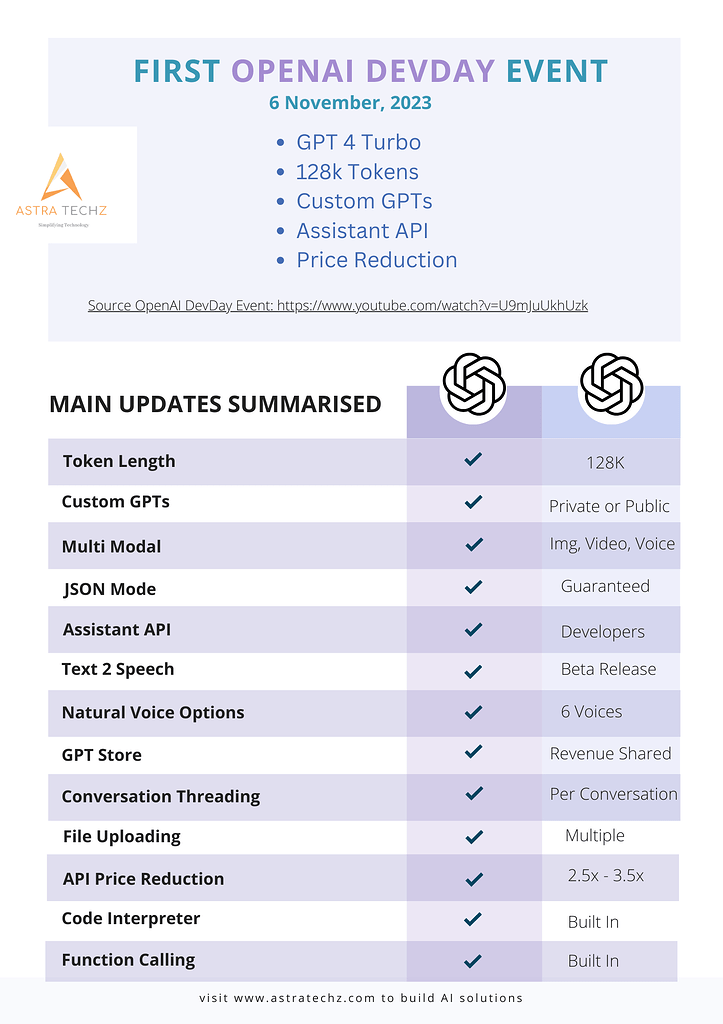

Streaming response:
這張圖片是關於「第一屆 OpenAI 開發者日活動」的摘要，日期是2023年11月6日。主要更新包括：

- **GPT 4 Turbo**
- **128k Tokens**
- **自定義 GPTs**
- **助手 API**
- **價格降低**

圖片的主要更新摘要如下：

- **Token 長度**：128K
- **自定義 GPTs**：私人或公開
- **多模態**：支持圖像、視頻、語音
- **JSON 模式**：保證提供
- **助手 API**：面向開發者
- **文字轉語音**：Beta 版本
- **自然語音選項**：6 種語音
- **GPT 商店**：收入共享
- **對話線程**：每次對話
- **文件上傳**：多個文件
- **API 價格降低**：降低2.5倍至3.5倍
- **代碼解釋器**：內建
- **函數調用**：內建

圖片底部有一個網站連結，指向 www.astratechz.com，提供 AI 解決方案的建設。

In [20]:
# Encoding image
IMAGE_PATH = "./assets/04-using-openai-api-gpt4o-sample-image.png"
encoded_image_file = encode_image(IMAGE_PATH)
html_code = f'<img src="{encoded_image_file}" alt="Image" style="max-width: 100%; height: auto;">'
display(HTML(html_code))

# Create messages and stream responses
messages_file = create_messages(encoded_image_file)
stream_response(llm, messages_file)

## Configuring Multimodal AI with System and User Prompts
這個教學展示如何使用 **system prompts** 和 **user prompts** 來配置多模態 AI，以及如何處理和解釋基于圖像的財務表格。


### What Are Prompts? 

**System Prompt**
定義 AI 的身份、責任和行為:

* 設定 AI 的上下文, 確保一致的回應。
* 範例: "你是一位專門解析表格的財務助理。"

**User Prompt**
給出任務特定的指示以引導 AI:

* 指定使用者希望 AI 做什麼。
* 範例: "分析這個財務表格並總結洞察。"

### Step 1: Set Up the ChatOpenAI Object
```ChatOpenAI``` object 初始化模型，並設定所需的配置，例如溫度和模型類型。

In [21]:
# Create the ChatOpenAI object
llm = ChatOpenAI(temperature=0.1, model_name="gpt-4o", streaming=True)

### Step2: Encode and Display the Image
圖像需要被編碼成 Base64 格式，以便 AI 能處理它們。 


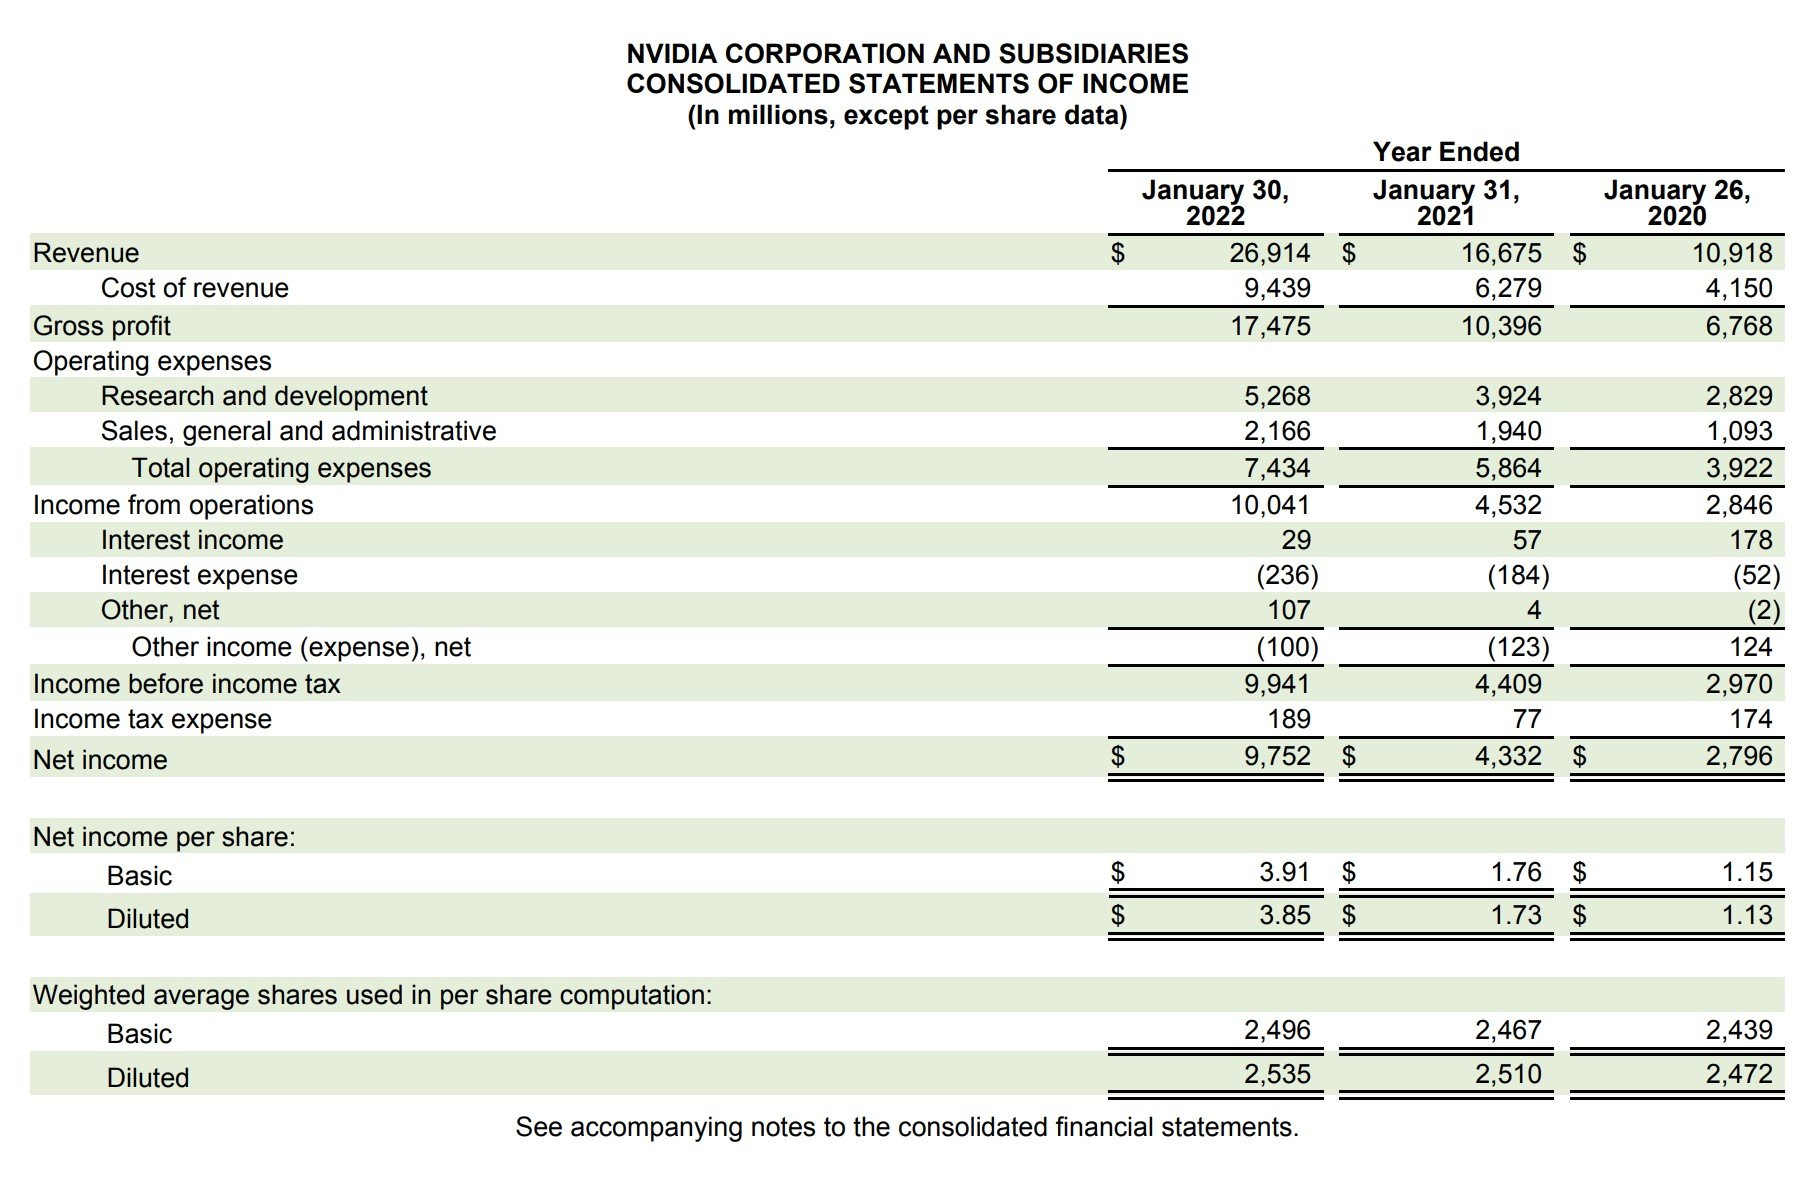

In [22]:
IMAGE_URL = "https://media.wallstreetprep.com/uploads/2022/05/24100154/NVIDIA-Income-Statement.jpg?_gl=1*zqx63z*_gcl_au*MTI3Njg2MTE3Mi4xNzM1NDg1OTky*_ga*Mjg1MjY3NTAzLjE3MzU0ODU5OTI.*_ga_0X18K5P59L*MTczNTQ4NTk5MS4xLjAuMTczNTQ4NTk5MS42MC4wLjE1OTkyODA0MTI."

encoded_image_url = encode_image(IMAGE_URL)
display(Image(url=encoded_image_url))  # Display the original image.

### Step 3: Define System and User Prompts
定義系統和使用者提示，以引導 AI 的行為和任務執行。

In [23]:
# System prompt: Describe the AI's role and responsibilities
system_prompt = """你是一個專門解析表格的財務助理。你的任務是分析提供的表格格式財務表並總結有趣的洞察。"""

# User prompt: Provide instructions for the task
user_prompt = """給你一個表格格式的財務表，請總結有趣的洞察。"""

### Step 4: Create Messages for the AI
結合 system prompt, user prompt, and the 編譯後的 image into a 結構化的 message format.

In [24]:
messages = [
    {"role": "system", "content": system_prompt},
    {
        "role": "user",
        "content": [
            {"type": "text", "text": user_prompt},
            {"type": "image_url", "image_url": {"url": encoded_image_url}},
        ],
    },
]

### Step 5: Stream the AI's Response
使用 AI 模型處理訊息並流式傳輸結果。

In [25]:
def stream_response(llm, messages):
    response = llm.stream(messages)  # Stream AI response
    print("Streaming response:")
    for chunk in response:
        print(
            chunk.content, end="", flush=True
        )  # Print each response chunk in real time


# Execute streaming
stream_response(llm, messages)

Streaming response:
這份財務報表顯示了NVIDIA在過去三年的收入和淨收入的顯著增長。以下是一些有趣的洞察：

1. **收入增長**：
   - 2022年的收入為26,914百萬美元，相較於2021年的16,675百萬美元和2020年的10,918百萬美元，顯示出強勁的增長。

2. **淨收入增長**：
   - 2022年的淨收入為9,752百萬美元，較2021年的4,332百萬美元和2020年的2,796百萬美元大幅增加。

3. **毛利率**：
   - 2022年的毛利為17,475百萬美元，顯示出公司在控制成本方面的有效性，毛利率保持在高水平。

4. **營運費用**：
   - 營運費用從2020年的3,922百萬美元增加到2022年的7,434百萬美元，顯示出公司在研發和銷售方面的投入增加。

5. **每股收益**：
   - 基本每股收益從2020年的1.15美元增至2022年的3.91美元，顯示出股東回報的顯著提升。

6. **稅前收入**：
   - 稅前收入在2022年達到9,941百萬美元，顯示出公司在稅前盈利能力上的增強。

這些數據顯示NVIDIA在收入和盈利能力方面的強勁增長，並且在研發和市場拓展上持續投入。